# Artifical neural network

Goal: predicts whether a borrower will pay back their loann

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preview data, shape, variable types, and if there are any missing values

In [2]:
data = pd.read_csv("LendingClub.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [4]:
data.shape

(395219, 23)

In [5]:
data.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

In [6]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### Convert categorical variable to numerical variables

In [7]:
# get list of all object (text or mixed) variable types
catagorical = data.select_dtypes('object').columns
catagorical

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [8]:
len(catagorical)

11

11 variables contain catagorical data. Identify the unique values and transform the data into numerical variables. Perform
cleaning operations on a copy of the source data.

In [9]:
cleanData = data.copy()

In [10]:
cleanData.shape

(395219, 23)

##### 1) term

In [11]:
cleanData.term.unique()

array(['36 months', '60 months'], dtype=object)

Use a dictionary and replace for the term variable

In [12]:
term_vals = {"term" : {"36 months": 36, "60 months": 60}}
cleanData.replace(term_vals, inplace=True)

In [13]:
cleanData.term.value_counts()

36    301247
60     93972
Name: term, dtype: int64

##### 2) grade

grade is redudant with sub-grade so grade column is dropped

In [14]:
cleanData.drop('grade', axis=1, inplace=True)

##### 3) sub-grade

In [15]:
len(cleanData['sub_grade'].unique())

35

In [16]:
sub_grade_dummy = pd.get_dummies(cleanData['sub_grade'], prefix='sub_grade')

In [17]:
cleanData = pd.concat([cleanData, sub_grade_dummy], axis=1)

In [18]:
cleanData.drop('sub_grade', axis=1, inplace=True)

##### 4) home ownership

In [19]:
cleanData.home_ownership.unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [20]:
home_own_dummy = pd.get_dummies(cleanData['home_ownership'], prefix='home_own')

In [21]:
cleanData = pd.concat([cleanData, home_own_dummy], axis=1)

In [22]:
cleanData.drop('home_ownership', axis=1, inplace=True)

In [23]:
cleanData.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_own_ANY,home_own_MORTGAGE,home_own_NONE,home_own_OTHER,home_own_OWN,home_own_RENT
0,10000.0,36,11.44,329.48,117000.0,Not Verified,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Not Verified,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Source Verified,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Not Verified,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Verified,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### 5) loan status

In [24]:
cleanData.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Since loan status is the target variable, simply convert those to fully paid = 1 and charged off = 0

In [25]:
target_vals = {"loan_status": {"Fully Paid": 1, "Charged Off": 0}}
cleanData.replace(target_vals, inplace=True)

In [26]:
cleanData.loan_status.value_counts()

1    317696
0     77523
Name: loan_status, dtype: int64

##### 6) verification status, , initial list status, purpose, application type

In [27]:
print(cleanData.verification_status.unique())
print(cleanData.initial_list_status.unique())
print(cleanData.purpose.unique())
print(cleanData.application_type.unique())

['Not Verified' 'Source Verified' 'Verified']
['w' 'f']
['vacation' 'debt_consolidation' 'credit_card' 'home_improvement'
 'small_business' 'major_purchase' 'other' 'medical' 'wedding' 'car'
 'moving' 'house' 'educational' 'renewable_energy']
['INDIVIDUAL' 'JOINT' 'DIRECT_PAY']


In [28]:
dummys = pd.get_dummies(cleanData[['verification_status', 'initial_list_status', 'purpose', 'application_type']])

In [29]:
cleanData = pd.concat([cleanData, dummys], axis=1)

In [30]:
cleanData.drop(['verification_status', 'initial_list_status', 'purpose', 'application_type'], axis=1, inplace=True)

##### 7) earliest credit line

In [31]:
from datetime import datetime
from datetime import date

Convert the earliest_cr_line column to a proper datetime format. Created a dummy column with the current date. Finally found the difference between those two columns which is the length of the longest credit line.

In [32]:
converted_date = pd.to_datetime(cleanData['earliest_cr_line'])
converted_date

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
395214   2004-11-01
395215   2006-02-01
395216   1997-03-01
395217   1990-11-01
395218   1998-09-01
Name: earliest_cr_line, Length: 395219, dtype: datetime64[ns]

In [33]:
cleanData['converted_date'] = converted_date

In [34]:
now = datetime.now()
dt_string = pd.to_datetime(now.strftime('%Y-%m'))
dt_string

Timestamp('2020-07-01 00:00:00')

In [35]:
cleanData['today'] = dt_string

In [36]:
print(cleanData['converted_date'].dtypes)

datetime64[ns]


In [37]:
print(cleanData['today'].dtypes)

datetime64[ns]


In [38]:
cleanData['longest_cr_line_days'] = cleanData['today'] - cleanData['converted_date']

Drop the columns earliest_cr_line, today, and converted_date

In [39]:
cleanData.drop(['earliest_cr_line', 'today', 'converted_date'], axis=1, inplace=True)

In [40]:
print(cleanData['longest_cr_line_days'].dtype)

timedelta64[ns]


In [41]:
cleanData['longest_cr_line_days'] = (cleanData['longest_cr_line_days'] / np.timedelta64(1,'D')).astype(int)

In [42]:
cleanData.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_A1,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_own_ANY,home_own_MORTGAGE,home_own_NONE,home_own_OTHER,home_own_OWN,home_own_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,longest_cr_line_days
0,10000.0,36,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,10988
1,8000.0,36,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5844
2,15600.0,36,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4718
3,7200.0,36,6.49,220.65,54000.0,1,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5052
4,24375.0,60,17.27,609.33,55000.0,0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,7793


In [43]:
print(cleanData['longest_cr_line_days'].dtype)

int32


##### 8) extract the zip code from each address

In [44]:
import re

In [45]:
cleanData['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
395214       12951 Williams Crossing\nJohnnyville, DC 30723
395215    0114 Fowler Field Suite 028\nRachelborough, LA...
395216     953 Matthew Points Suite 414\nReedfort, NY 70466
395217    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
395218          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [46]:
list_of_zipcodes = []

In [47]:
for address in cleanData['address']:
    zipcode = re.findall('[A-Z]{2} ([0-9]+$)', address)
    list_of_zipcodes.append(zipcode[0])

Add the list of zipcodes to the dataset

In [49]:
cleanData['zipcode'] = list_of_zipcodes

The zipcode becomes the location feature and renders the address column obselete thus it will be dropped.

In [50]:
cleanData.drop(['address'],axis=1, inplace=True)

In [51]:
cleanData.zipcode

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
395214    30723
395215    05113
395216    70466
395217    29597
395218    48052
Name: zipcode, Length: 395219, dtype: object

Zipcode was added as an object but they are numbers only so I will change the data type to integer.

In [52]:
cleanData['zipcode'] = cleanData['zipcode'].astype(int)

In [53]:
# setting the column display back to the default number
pd.reset_option("display.max_columns")

### Check our data types and confirm all variables are numeric

In [54]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395219 entries, 0 to 395218
Data columns (total 79 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  int64  
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

### Split the data (70/30)

Put the target variable in the first column position to make splitting into train and test easier

In [55]:
target = cleanData.pop('loan_status')

In [56]:
cleanData.insert(0, 'loan_status', target)

In [57]:
cleanData.head()

,loan_status,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,longest_cr_line_days,zipcode
0,1,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,...,0,0,0,1,0,0,1,0,10988,22690
1,1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,...,0,0,0,0,0,0,1,0,5844,5113
2,1,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,...,0,0,0,0,0,0,1,0,4718,5113
3,1,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,1,0,5052,813
4,0,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,...,0,0,0,0,0,0,1,0,7793,11650


In [58]:
X = cleanData.iloc[:, 1:]

In [59]:
y = cleanData.iloc[:, 0]
y

0         1
1         1
2         1
3         1
4         0
         ..
395214    1
395215    1
395216    1
395217    1
395218    1
Name: loan_status, Length: 395219, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=90)

### Normalize all features

In [61]:
from sklearn.preprocessing import MinMaxScaler

In [62]:
scaler = MinMaxScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Build sequential model (4 layers)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

In [65]:
model = Sequential()

"""my model
model.add(Dense(78, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))"""

#teachers model
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.3842 - accuracy: 0.8505 - val_loss: 0.3723 - val_accuracy: 0.8547
Epoch 2/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.3361 - accuracy: 0.8660 - val_loss: 0.4706 - val_accuracy: 0.8230
Epoch 3/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2895 - accuracy: 0.8852 - val_loss: 0.4698 - val_accuracy: 0.8468
Epoch 4/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2862 - accuracy: 0.8864 - val_loss: 0.3441 - val_accuracy: 0.8724
Epoch 5/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2843 - accuracy: 0.8871 - val_loss: 0.4087 - val_accuracy: 0.8581
Epoch 6/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2839 - accuracy: 0.8872 - val_loss: 0.4055 - val_accuracy: 0.8608
Epoch 7/10
8646/8646 [==============================] - 12s 1ms/step - loss: 0.2830 - accuracy: 0.8874 - val_loss: 0.4096 - val_ac

### Evaluate model performance

In [68]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,0.384162,0.850524,0.372277,0.854705
1,0.336130,0.865973,0.470612,0.823044
2,0.289535,0.885246,0.469811,0.846777
3,0.286184,0.886435,0.344117,0.872383
4,0.284295,0.887100,0.408657,0.858087


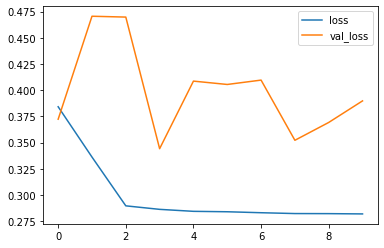

In [69]:
history[['loss', 'val_loss']].plot()

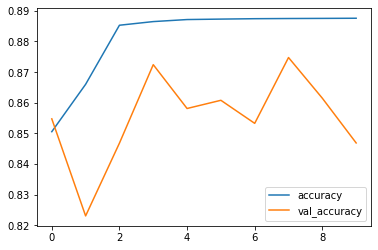

In [70]:
history[['accuracy', 'val_accuracy']].plot()

In [71]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [72]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
print('confusion_matrix=\n', confusion_matrix(y_test, predictions))

confusion_matrix=
 [[14439  8994]
 [ 9165 85968]]


In [73]:
print('accuracy_score=', accuracy_score(y_test, predictions))

accuracy_score= 0.8468447953038813


In [74]:
print('recall_score=', recall_score(y_test, predictions))

recall_score= 0.903661190123301


In [75]:
print('precision_score=', precision_score(y_test, predictions))

precision_score= 0.9052884311619385
